<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-December/blob/main/22-01-19-SVM/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes

https://1drv.ms/u/s!AmSu_rSXl5m3iTEdiabV6_MYBrJL?e=1bAW24

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

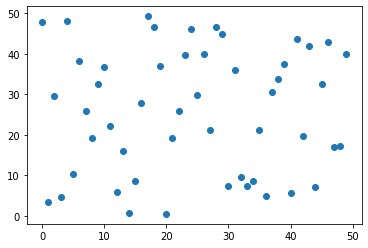

In [ ]:
x1 = np.arange(50)
x2 = np.random.rand(50)*50

plt.scatter(x1, x2)

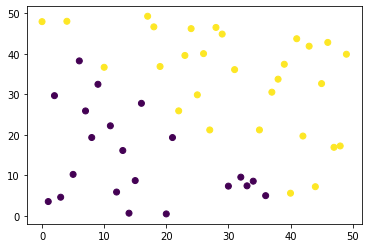

In [ ]:
y = np.where(x1+x2 <= 45, 0, 1)

plt.scatter(x1, x2, c = y)

In [ ]:
X = np.dstack([x1, x2])[0]

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

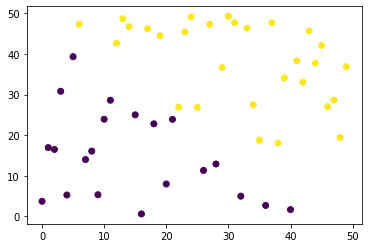

In [ ]:
plt.scatter(x1, x2, c = model.predict(X))

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


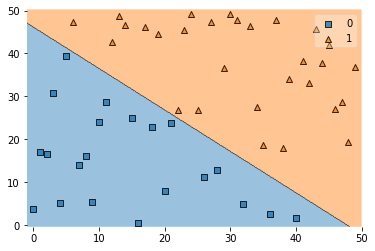

In [ ]:
plot_decision_regions(X, y, clf = model)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


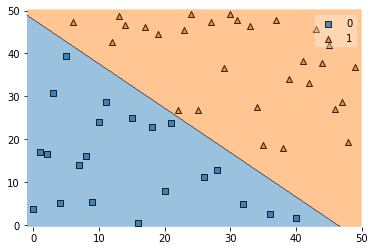

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X, y)
plot_decision_regions(X, y, clf = log)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

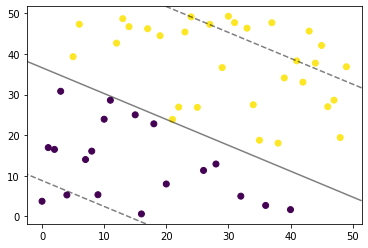

In [ ]:
model = SVC(kernel='linear', C = 0.0001)
model.fit(X, y)

plt.scatter(x1, x2, c = model.predict(X))

plot_svc_decision_function(model)

In [ ]:
y[-1] = 0

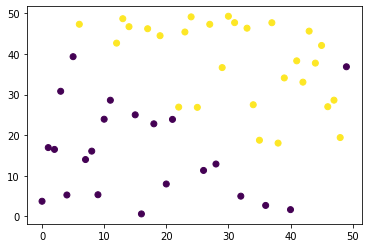

In [ ]:
plt.scatter(x1, x2, c = y)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


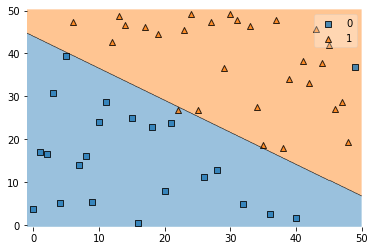

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X, y)
plot_decision_regions(X, y, clf = log)

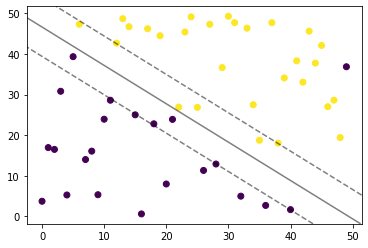

In [ ]:
model = SVC(kernel='linear', C = 100)
model.fit(X, y)

plt.scatter(x1, x2, c = y)

plot_svc_decision_function(model)

# Scratch

In [ ]:
class SVM():

    def __init__(self, iterations=1000, learning_rate = 0.01, C=1):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.C = C
    
    def fit(self, X, Y):
        n_samples, n_features = X.shape

        self.W = np.random.rand(n_features)
        self.b = np.random.randint(0, 10)

        for _ in range(self.iterations):
            for x, y in zip(X, Y):

                correct = y*(np.dot(self.W, x) + self.b) >= 1
                if correct:
                    self.W = self.W - self.learning_rate * (self.W)
                else:
                    self.W = self.W - self.learning_rate * (self.W - self.C*(np.dot(x, y)))
                    self.b = self.b - self.learning_rate * (-self.C * y)

    def predict(self, X):
        distance = X.dot(self.W) + self.b
        return np.sign(distance)

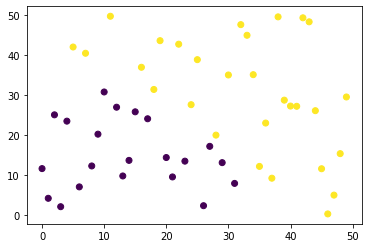

In [ ]:
x1 = np.arange(50)
x2 = np.random.rand(50)*50
y = np.where(x1+x2 <= 45, -1, 1)

plt.scatter(x1, x2, c = y)

In [ ]:
model = SVM(iterations = 10000, C = 10000)

In [ ]:
X = np.dstack([x1, x2])[0]

model.fit(X, y)

In [ ]:
model.predict(X)

array([-1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


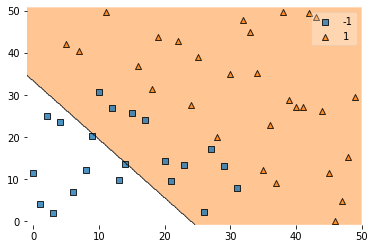

In [ ]:
# plt.scatter(X[:, 0], X[:, 1], c = model.predict(X))
plot_decision_regions(X, y, clf = model)

# Dual Form

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles()

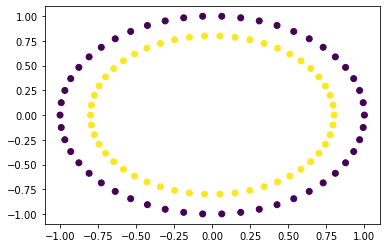

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y)

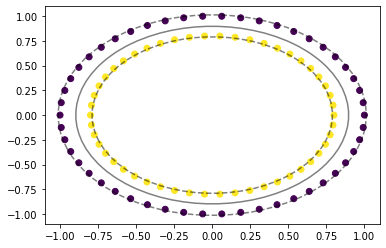

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel = 'rbf')
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c = y)
plot_svc_decision_function(model)
# plot_decision_regions(X, y, clf = model)

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons()
model = SVC(kernel = 'poly', degree=50)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c = y)
plot_svc_decision_function(model)
# plot_decision_regions(X, y, clf = model)

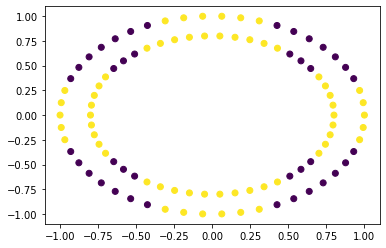

In [ ]:
from sklearn.linear_model import LogisticRegression

X, y = make_circles()

X2 = np.dstack([(X[:, 0] * X[:, 1])**2, (X[:, 0] * X[:, 1])**3, (X[:, 0] * X[:, 1])])[0]
model = LogisticRegression()
model.fit(X2, y)

plt.scatter(X[:, 0], X[:, 1], c = model.predict(X2))